In [2]:
import os
from src import utils 
import numpy as np

import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

from matplotlib import pyplot as plt
import seaborn as sns

def translate_yaml(yaml_path):
    yaml_data = utils.load_yaml(yaml_path)

    dataset_config = yaml_data.pop('dataset_config')
    model_config = yaml_data.pop('model_config')
    optim_config = yaml_data.pop('optim_config')
    other_config = yaml_data.pop('other_config')

    dataset_config.pop('data_paths')

    yaml_data['data_augmentation'] = ''.join([e[0] for e in yaml_data['data_augmentation']])
    yaml_data['input_data_shape'] = '_'.join([str(e) for e in yaml_data['input_data_shape']])
    yaml_data['output_data_shape'] = '_'.join([str(e) for e in yaml_data['output_data_shape']])
    yaml_data['test_metric_indexes'] = '_'.join([str(e) for e in yaml_data['test_metric_indexes']])

    yaml_data.update(dataset_config)
    yaml_data.update(model_config)
    # yaml_data.update(optim_config)
    yaml_data.update(other_config)

    return yaml_data

def load_test_results(test_metrics_path):
    metric_dict= {}
    for metric in os.listdir(test_metrics_path):
        metric_name = metric[:-4]
        metric_data = np.load(os.path.join(test_metrics_path, metric))
        metric_dict[f'{metric_name}_mean'] = np.mean(metric_data) if len(metric_data) > 0 else 0
        metric_dict[f'{metric_name}_std'] = np.std(metric_data) if len(metric_data) > 0 else 0
    return metric_dict
        

2023-05-31 09:43:02.439440: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/cocomputer/anaconda3/envs/prueba/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/home/cocomputer/anaconda3/envs/prueba/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/cocomputer/anaconda3/envs/prueba/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/home/cocomputer/anaconda3/envs/prueba/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/cocomputer/anaconda3/envs/prueba/lib/python3.7/site-packages/lpips/weights/v0.1/vgg.pth
2.4.1


In [3]:
results_path = os.path.abspath('results')

if not os.path.exists(results_path):
    raise ValueError('There is no results folder.')

dataset_list = os.listdir(results_path)
dataset_path_list = [os.path.join(results_path, e) for e in os.listdir(results_path)]

all_results = {}

for dataset, dataset_path in zip(dataset_list, dataset_path_list):
    model_list = os.listdir(dataset_path)
    model_path_list = [os.path.join(dataset_path, e) for e in os.listdir(dataset_path)]
    for model, model_path in zip(model_list, model_path_list):
        additfolder_list = os.listdir(model_path)
        additfolder_path_list = [os.path.join(model_path, e) for e in os.listdir(model_path)]
        cont = 0
        for additfolder, additfolder_path in zip(additfolder_list, additfolder_path_list):
            config_list = os.listdir(additfolder_path)
            config_path_list = [os.path.join(additfolder_path, e) for e in os.listdir(additfolder_path)]
            for config, config_path in zip(config_list, config_path_list):
                yaml_path = os.path.join(config_path, 'train_configuration.yaml')
                test_metrics_path = os.path.join(config_path, 'test_metrics')
                
                if os.path.exists(yaml_path) and os.path.exists(test_metrics_path):
                    yaml_data = translate_yaml(yaml_path)
                    yaml_data.update(load_test_results(test_metrics_path))
                    all_results[f'{model}_{dataset}_{cont}'] = yaml_data

                    all_results[f'{model}_{dataset}_{cont}'].update({'saving_path': config_path})

                    cont += 1


# Show a pandas.DataFrame with the information

In [4]:
df = pd.DataFrame(all_results).T

# Remove the colums with the same information and visuzlize it
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df.copy().drop(cols_to_drop, axis=1)

,batch_size,dataset_name,discriminator_optimizer,input_data_shape,learning_rate,number_of_epochs,optimizer,output_data_shape,crappifier,ssim_mean,ssim_std,alex_mean,alex_std,psnr_mean,psnr_std,mse_mean,mse_std,vgg_mean,vgg_std,saving_path
unet_EM_0,4,EM,AdamW,90_64_64_1,0.0005,20,AdamW,90_256_256_1,em_poisson_crappify,0.42652,0.0,0,0,14.290348,0.0,0.037236,0.0,0,0,/home/cocomputer/git/MicroscoPy/results/EM/une...
unet_EM_1,4,EM,AdamW,90_64_64_1,0.001,5,AdamW,90_256_256_1,em_poisson_crappify,0.40454,0.0,0,0,15.072568,0.0,0.031099,0.0,0,0,/home/cocomputer/git/MicroscoPy/results/EM/une...
unet_EM_2,4,EM,AdamW,90_64_64_1,0.005,20,AdamW,90_256_256_1,em_poisson_crappify,0.414133,0.0,0,0,13.703012,0.0,0.042628,0.0,0,0,/home/cocomputer/git/MicroscoPy/results/EM/une...
unet_EM_3,4,EM,AdamW,90_64_64_1,0.001,10,AdamW,90_256_256_1,em_poisson_crappify,0.423665,0.0,0,0,14.376402,0.0,0.036506,0.0,0,0,/home/cocomputer/git/MicroscoPy/results/EM/une...
unet_EM_4,4,EM,AdamW,90_64_64_1,0.0005,10,AdamW,90_256_256_1,em_poisson_crappify,0.427813,0.0,0,0,14.359768,0.0,0.036646,0.0,0,0,/home/cocomputer/git/MicroscoPy/results/EM/une...
unet_EM_5,4,EM,AdamW,90_64_64_1,0.0005,5,AdamW,90_256_256_1,em_poisson_crappify,0.399906,0.0,0,0,14.336056,0.0,0.036846,0.0,0,0,/home/cocomputer/git/MicroscoPy/results/EM/une...
unet_EM_6,4,EM,AdamW,90_64_64_1,0.005,5,AdamW,90_256_256_1,em_poisson_crappify,0.312463,0.0,0,0,14.393086,0.0,0.036366,0.0,0,0,/home/cocomputer/git/MicroscoPy/results/EM/une...
unet_EM_7,4,EM,AdamW,90_64_64_1,0.005,10,AdamW,90_256_256_1,em_poisson_crappify,0.435949,0.0,0,0,15.348394,0.0,0.029185,0.0,0,0,/home/cocomputer/git/MicroscoPy/results/EM/une...
unet_EM_8,4,EM,AdamW,90_64_64_1,0.001,20,AdamW,90_256_256_1,em_poisson_crappify,0.421442,0.0,0,0,14.149803,0.0,0.038461,0.0,0,0,/home/cocomputer/git/MicroscoPy/results/EM/une...
unet_EM_9,2,EM,Adam,90_64_64_1,0.001,100,Adam,90_256_256_1,em_poisson_crappify,0.47836,0.035238,0.701078,0.019329,17.317228,1.80699,0.020464,0.010531,0.627714,0.010545,/home/cocomputer/git/MicroscoPy/results/EM/une...


# Visualize the results

## Inspect a single combination

In [5]:
combination = 'unet_EM_0'
config_path = df.loc[combination]['saving_path']
print(df.loc[combination])

batch_size                                                                      4
data_augmentation                                                             rhv
datagen_sampling_pdf                                                            0
dataset_name                                                                   EM
discriminator_learning_rate                                                 0.001
discriminator_lr_scheduler                                               OneCycle
discriminator_optimizer                                                     AdamW
input_data_shape                                                       90_64_64_1
learning_rate                                                              0.0005
model                                                                        unet
number_of_epochs                                                               20
optimizer                                                                   AdamW
output_data_shap

In [12]:
train_metrics_path = os.path.join(config_path, 'train_metrics')
test_metrics_path = os.path.join(config_path, 'test_metrics')
train_images_path = os.path.join(config_path, 'training_images')
predicted_images_path = os.path.join(config_path, 'predicted_images')

dict_keys(['val_ssim_loss', 'val_mean_squared_error', 'mean_squared_error', 'val_loss', 'ssim_loss', 'loss'])


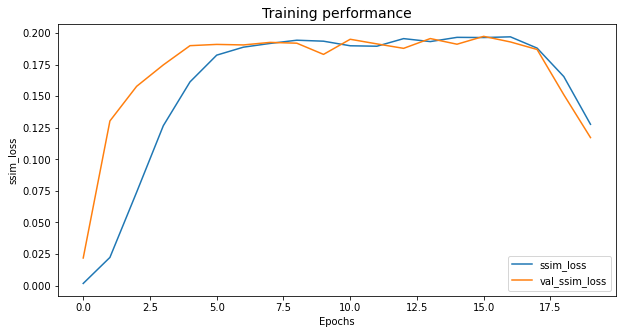

In [13]:


train_metrics = {}
for file in os.listdir(train_metrics_path):
    if file != 'time.npy':
        values = np.load(os.path.join(train_metrics_path, file))
        name = file[:-4]
        train_metrics[name] = values 

print(train_metrics.keys())

desired_metric = 'ssim_loss' # 'loss', 'ssim_loss', 'mean_squared_error'

plt.figure(figsize=(10,5))
plt.title('Training performance', fontsize=14)
for k in [desired_metric, f'val_{desired_metric}']:
    plt.plot(train_metrics[k], label=k)
plt.ylabel(desired_metric)
plt.xlabel('Epochs')
plt.legend();

In [14]:
from skimage import io

for file in os.listdir(train_images_path)[:5]:
    print(file)
    plt.imshow(io.imread(os.path.join(train_images_path, file)))
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/cocomputer/git/MicroscoPy/results/EM/unet/scale4/scale4_epc20_btch4_lr0.0005_optim-AdamW_lrsched-OneCycle_seed666/training_images'